In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from skopt import BayesSearchCV

import os
from joblib import dump, load

## Import du dataset

In [2]:
mnist = np.load("../data/mnist_prepared.npz")

In [3]:
X = mnist["X"]
Y = mnist["Y"]

### Train_test_split

In [4]:
def persistent_train_test_split(x, y, path, train_size):

    t_size = str(train_size).replace('.', '_')
    file_name = "GaussNB_data_split" + '_' + t_size
    path_train_size = path + file_name
    
    if os.path.isfile(path_train_size):
        X_train, X_test, Y_train, Y_test = load(path_train_size)
        print("Le split a été importé avec succès")
    else :         
        X_train, X_test, Y_train, Y_test = train_test_split(
            x,
            y,
            train_size = train_size,   # On entraine sur 5% de notre dataset
            stratify = y,
            shuffle = True,
            random_state = 42
        )
        
        dump((X_train, X_test, Y_train, Y_test), path_train_size)
        print("Le split a été créé et importé avec succès")

    return X_train, X_test, Y_train, Y_test

In [72]:
GNB_path_data = "../data/"

X_train, X_test, Y_train, Y_test = persistent_train_test_split(X, Y, GNB_path_data, 0.05)

Le split a été créé et importé avec succès


In [73]:
Y_train.shape

(3500,)

## Gaussian Naive Bayes model

In [7]:
Pipeline_GNB = Pipeline([
    ('std_scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

##### Fonction de sauvegarde de modèles entraînés

In [101]:
def dump_artefact(tuned_model, path_artefact : str, artefact_name : str):

    
    score = round(tuned_model.best_score_, 3)  # on arrondis le score à 3 décimales
    score = str(score).replace('.', '')
    name = artefact_name + '_' + score

    path = path_artefact + name
    if os.path.isfile(path):
        print(f"Le modèle {artefact_name} existe déjà")

    else :
        model = dump(tuned_model.best_estimator_, path)  # Si le modèle a déjà été crée précédemment, alors on l'importe
        print(f"L'artefact de {artefact_name} a été crée avec succès")
        

#### Recherche d'hyperparamètres n°1

In [8]:
param_grid_GNB1 = {
    'gnb__var_smoothing' : np.random.lognormal(0, 20, 100)
}

In [9]:
Grid_GNB1 = BayesSearchCV(
    estimator = Pipeline_GNB,
    search_spaces = param_grid_GNB1,
    n_iter = 20,
    scoring = 'accuracy',
    cv = KFold(n_splits = 4),
    verbose = 4,
    n_jobs = 10
)

In [10]:
Grid_GNB1.fit(X_train, Y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

,estimator,Pipeline(step...aussianNB())])
,search_spaces,{'gnb__var_smoothing': array([2.2085...52739928e+02])}
,optimizer_kwargs,None
,n_iter,20
,scoring,'accuracy'
,fit_params,None
,n_jobs,10
,n_points,1
,iid,'deprecated'
,refit,True
,cv,KFold(n_split...shuffle=False)


In [102]:
print("Best params : ", Grid_GNB1.best_params_ )
print("Best score : ", Grid_GNB1.best_score_)

Best params :  OrderedDict({'gnb__var_smoothing': 0.20257166731549925})
Best score :  0.6891428571428572


In [104]:
dump_artefact(
    tuned_model = Grid_GNB1,
    path_artefact = "../saved_models/GaussianNB_persistent/",
    artefact_name = "GNB1"
)

L'artefact de GNB1 a été crée avec succès


#### Recherche d'hyperparamètres n°2

In [105]:
Grid_GNB2 = Grid_GNB1.fit(X_train, Y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

In [106]:
print("Best params : ", Grid_GNB2.best_params_ )
print("Best score : ", Grid_GNB2.best_score_)

Best params :  OrderedDict({'gnb__var_smoothing': 0.05284397924924756})
Best score :  0.6942857142857143


In [107]:
dump_artefact(Grid_GNB2, "../saved_models/GaussianNB_persistent/", "GNB2")

L'artefact de GNB2 a été crée avec succès


#### Recherche n°3

In [108]:
Grid_GNB3 = Grid_GNB1.fit(X_train, Y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

In [109]:
print("Best params : ", Grid_GNB3.best_params_ )
print("Best score : ", Grid_GNB3.best_score_)

Best params :  OrderedDict({'gnb__var_smoothing': 0.22801732320891707})
Best score :  0.6862857142857143


In [110]:
dump_artefact(Grid_GNB3, "../saved_models/GaussianNB_persistent/", "GNB3")

L'artefact de GNB3 a été crée avec succès


#### Learning Curve

In [111]:
def best_model(path):
    biggest_score = 0
    best_model = ""
    for artefact_name in os.listdir(path):
        if artefact_name != ".ipynb_checkpoints":
            score = int(artefact_name[-4:])
            if score > biggest_score:
                biggest_score = score
                best_model = artefact_name
    path_best_model = path + best_model
    model = load(path_best_model)
    return model
            

In [112]:
Best_model = best_model("../saved_models/GaussianNB_persistent/")

In [114]:
N, train_scores, val_scores = learning_curve(Best_model, X_train, Y_train, train_sizes=np.linspace(0.1, 1, 20))

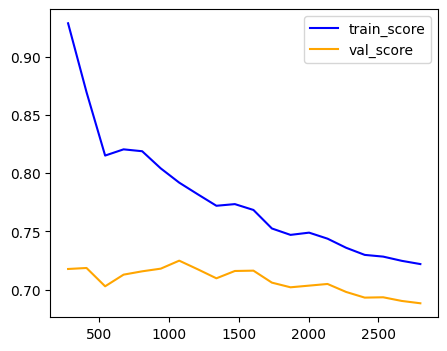

In [121]:
plt.figure(figsize=(5, 4))
plt.plot(N, train_scores.mean(axis=1), c='blue', label="train_score")
plt.plot(N, val_scores.mean(axis=1), c='orange', label="val_score")
plt.legend()

Le modèle est en underfitting, il n'arrive pas à repérer les liens entre les données en entrées et leurs vraie valeur. De plus, plus on lui donne de données et plus l'accuracy diminue, donc donner plus de données d'entraînement à ce modèle ne sert pas à grand chose.

#### Bagging
On va clôner le meilleur estimateur trouvé durant les différentes recherches pour l'hyper-paramètre var_smoothing, afin de diminuer la variance de nos prédictions.  
Le bagging ne va pas diminuer le bias de notre modèle mais il va améliorer les prédictions pour des nouveaux échantillons de données jamais vus.  
On peut utiliser un Bagging sans problème car, même si on entraînera différents modèles sur différents échantillons du dataset, ces nouveaux classifieurs ne favoriseront pas une classe plus qu'une autre car on a imposé un "stratify" dans notre train_test_split afin de garder les mêmes ratios entre les différentes classes dans notre train_set.

#### Train_test_split
On refait un train_test_split sur le dataset original afin de faire un bagging avec plus de données. On aura N-estimateurs qui vont à qu'on va entraîner - fit avec 80% du dataset original (celui du début contenant 70'000 lignes).  

In [116]:
X_train2, X_test2, Y_train2, Y_test2 = persistent_train_test_split(X, Y, GNB_path_data, 0.8)

Le split a été créé et importé avec succès


In [117]:
Bagging_GNB = BaggingClassifier(Best_model, n_estimators=21, max_samples=0.05)

In [118]:
Bagging_GNB.fit(X_train2, Y_train2)

,estimator,Pipeline(step...7924924756))])
,n_estimators,21
,max_samples,0.05
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [120]:
Bagging_GNB.score(X_test2, Y_test2)

0.7097857142857142

#### Conclusion  
Le score est assez bon malgré l'incompatibilité entre le Gaussian Naive Bayes et nos données et malgré le grand nombre de features du dataset (784 features). Même si on a supposé que nos données étaient distribuées en suivant une loi normale (ce qui n'est pas vrai), on a quand même eu un score élevé pour le GaussianNB. 